<a href="https://colab.research.google.com/github/sripujitha000/DEEP-LEARNING/blob/main/exp2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4955 - loss: 409.0252 - val_accuracy: 0.5011 - val_loss: 2.6967
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4944 - loss: 21.2207 - val_accuracy: 0.4976 - val_loss: 0.7548
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5056 - loss: 3.7842 - val_accuracy: 0.5019 - val_loss: 0.7400
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4979 - loss: 2.0711 - val_accuracy: 0.4969 - val_loss: 0.7098
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5023 - loss: 1.6271 - val_accuracy: 0.5017 - val_loss: 0.7067
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4978 - loss: 1.1081 - val_accuracy: 0.5013 - val_loss: 0.6981
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5060 - loss: 0.9813 - val_accuracy: 0.5074 - val_loss: 0.6969
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5042 - loss: 0.9087 - val_accuracy: 0.4998 - 

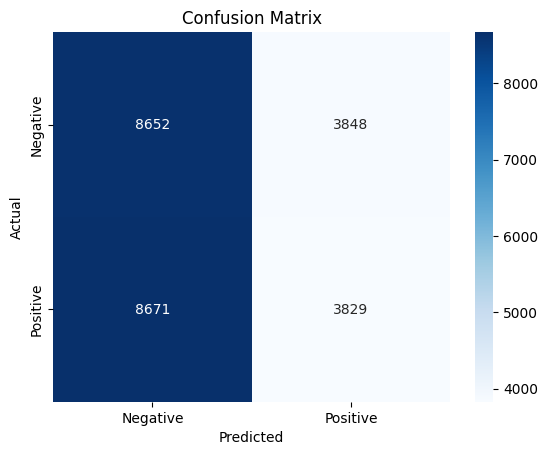

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:%2f%%"%(scores[1]*100))
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test)>0.5).astype("int32")
print(classification_report(y_test, y_pred,target_names=["Negative","Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ["Negative","Positive"], yticklabels = ["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
